In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# loading train data
train_df= pd.read_parquet('/content/drive/MyDrive/train.parquet')
train_df.head(2)

                            Patient-Uid       Date           Incident
0  a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2019-03-09  PRIMARY_DIAGNOSIS
1  a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f 2015-05-16  PRIMARY_DIAGNOSIS


In [5]:
# taking only target drug users data
target_data = train_df[train_df['Incident'] == 'TARGET DRUG']

In [ ]:
# Calculate dropoff rate by month
target_data['Date'] = pd.to_datetime(target_data['Date'])
target_data['Month'] = target_data['Date'].dt.month 
dropoff_rates = target_data.groupby('Month')['Patient-Uid'].nunique().diff().fillna(0)

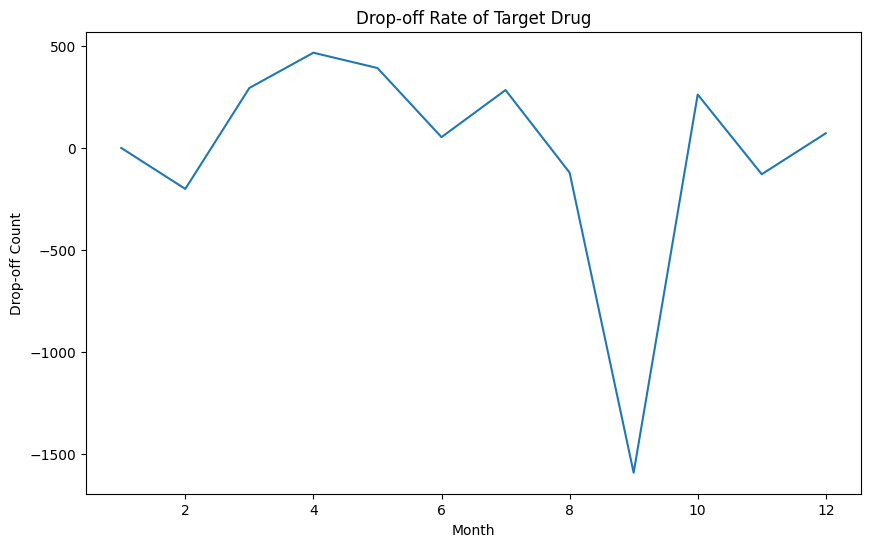

In [7]:
#visualizing the drop off rate over time
plt.figure(figsize = (10, 6))
dropoff_rates.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Drop-off Count')
plt.title('Drop-off Rate of Target Drug')
plt.show()

In [8]:
# to analyze events driving dropp-off
dropoff_reasons = train_df[train_df['Patient-Uid'].isin(target_data['Patient-Uid'])]
dropoff_reasons = dropoff_reasons[dropoff_reasons['Date'] < dropoff_reasons.groupby('Patient-Uid')['Date'].transform('max')]
dropoff_reasons = dropoff_reasons[dropoff_reasons['Incident'] != 'TARGET DRUG']

In [9]:
# frequency of each event leading to drop-off
event_freq = dropoff_reasons['Incident'].value_counts()

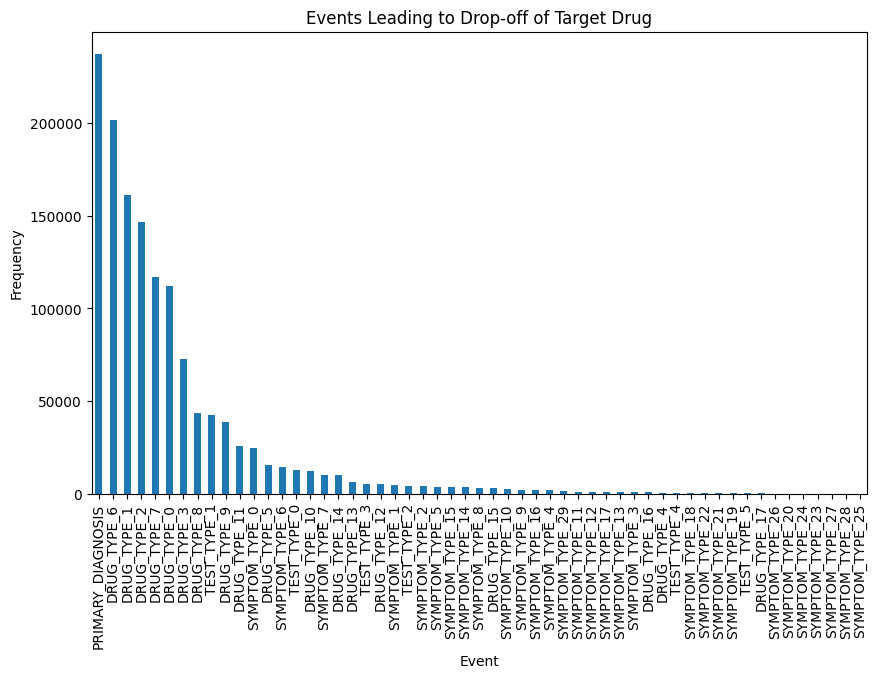

In [10]:
# Plot the events leading to drop-off
plt.figure(figsize=(10, 6))
event_freq.plot(kind='bar')
plt.xlabel('Event')
plt.ylabel('Frequency')
plt.title('Events Leading to Drop-off of Target Drug')
plt.show()